**TASK 3** Car Price Prediction with Machine Learning

● Collect car-related features like brand goodwill, horsepower, mileage, etc.
● Train a regression model to predict car prices based on these features.
● Handle data preprocessing, feature engineering, and model evaluation
● Use Python libraries like Pandas, Scikit-learn and Matplotlib for the workflow.
● Understand real-world applications of machine learning in price prediction.

In [2]:
# 1. Collect car-related features like brand goodwill, horsepower, mileage, etc.

import pandas as pd

car_data = []

n = int(input("How many cars do you want to enter? "))

for i in range(n):
    print(f"\nEnter details for Car {i+1}:")
    car_name = input("Car Name: ")
    year = int(input("Year: "))
    selling_price = float(input("Selling Price (in lakhs): "))
    present_price = float(input("Present Price (in lakhs): "))
    driven_kms = int(input("Driven Kms: "))
    fuel_type = input("Fuel Type (Petrol/Diesel/Electric): ")
    selling_type = input("Selling Type (Dealer/Individual): ")
    transmission = input("Transmission (Manual/Automatic): ")
    owner = int(input("Number of Previous Owners: "))

    car_data.append({
        "Car_Name": car_name,
        "Year": year,
        "Selling_Price": selling_price,
        "Present_Price": present_price,
        "Driven_kms": driven_kms,
        "Fuel_Type": fuel_type,
        "Selling_type": selling_type,
        "Transmission": transmission,
        "Owner": owner
    })

df = pd.DataFrame(car_data)

print("\nCollected Car Data:")
print(df)


How many cars do you want to enter? 1

Enter details for Car 1:
Car Name: alto
Year: 2000
Selling Price (in lakhs): 450000
Present Price (in lakhs): 400000
Driven Kms: 34
Fuel Type (Petrol/Diesel/Electric): Diesel
Selling Type (Dealer/Individual): Dealer
Transmission (Manual/Automatic): Manual
Number of Previous Owners: 1

Collected Car Data:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     alto  2000       450000.0       400000.0          34    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      1  


In [3]:
# 2. Train a regression model to predict car prices based on these features.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/car data.csv")


df = df.drop(['Car_Name'], axis=1)

le_fuel = LabelEncoder()
df['Fuel_Type'] = le_fuel.fit_transform(df['Fuel_Type'])

le_selling = LabelEncoder()
df['Selling_type'] = le_selling.fit_transform(df['Selling_type'])

le_trans = LabelEncoder()
df['Transmission'] = le_trans.fit_transform(df['Transmission'])

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

sample = pd.DataFrame({
    'Year': [2015],
    'Present_Price': [8.0],
    'Driven_kms': [20000],
    'Fuel_Type': le_fuel.transform(['Petrol']),
    'Selling_type': le_selling.transform(['Dealer']),
    'Transmission': le_trans.transform(['Manual']),
    'Owner': [0]
})
predicted_price = model.predict(sample)
print("Predicted Selling Price:", predicted_price[0])


Mean Squared Error: 0.8512259872131138
R2 Score: 0.9630473458807466
Predicted Selling Price: 6.1075000000000035


Data Loaded Successfully

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner           

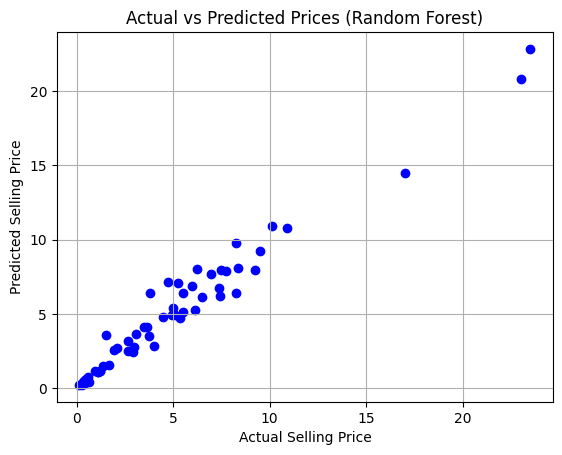


Best model saved as car_price_model.pkl


In [4]:
# 3. Handle data preprocessing, feature engineering, and model evaluation


import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import pickle

# Load Data
df = pd.read_csv("/content/car data.csv")
print("Data Loaded Successfully\n")
print(df.head())

# Data Preprocessing
df.columns = df.columns.str.strip()
print("\nColumns:", df.columns.tolist())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Encode categorical columns
cat_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Feature Engineering
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Drop unnecessary columns
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

print("\nAfter Feature Engineering:\n", df.head())

# Split Data
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model Training & Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}

print("\nModel Performance:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = r2
    print(f"{name}:")
    print(f"   R2 Score: {r2:.4f}")
    print(f"   MAE: {mae:.4f}")
    print("-"*40)

# Select Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} (R2 = {results[best_model_name]:.4f})")

# Visualization
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.grid(True)
plt.show()

# Save Best Model
with open("car_price_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("\nBest model saved as car_price_model.pkl")



Data Loaded Successfully
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner           

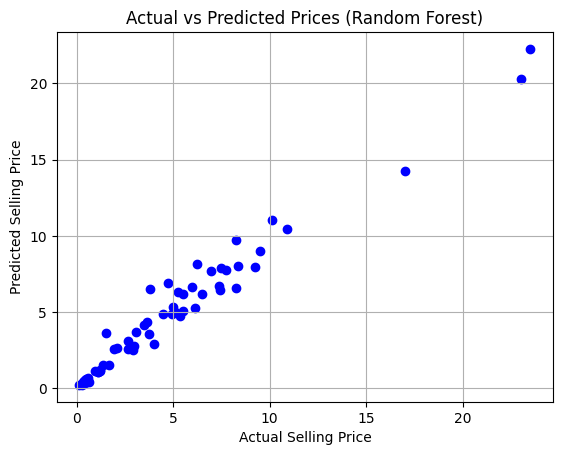


Best model saved as car_price_model.pkl


In [5]:
# 4. Use libraries like Pandas, Scikit-learn and Matplotlib for workflows.


import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import pickle

df = pd.read_csv("/content/car data.csv")
print("Data Loaded Successfully\n", df.head())

df.columns = df.columns.str.strip()
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

cat_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']
df.drop('Year', axis=1, inplace=True)
print("\nAfter Feature Engineering:\n", df.head())

# Drop Car_Name for training
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df['Selling_Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200, max_depth=8)
}

results = {}
print("\nModel Performance:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = r2
    print(f"{name}: R2 = {r2:.4f}, MAE = {mae:.4f}")

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} (R2 = {results[best_model_name]:.4f})")

y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.grid(True)
plt.show()

with open("car_price_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("\nBest model saved as car_price_model.pkl")


**5. Understand real word applications of Machine learning and price prediction.**



1. Real-World Application of Machine Learning

Machine Learning is used when a system needs to learn from data and make predictions or decisions without being explicitly programmed.

Here are a few examples:

Domain	Application	How ML Helps
Automobile Industry
Car Price Prediction
Forecast resale prices of used vehicles based on brand, age, fuel type, and mileage.
Banking & Finance
Loan Default Prediction
ML forecasts whether a customer will repay or default on the loan.
Healthcare
Disease Prediction
Models forecast diseases like diabetes or heart disease from medical information.
Retail & E-Commerce
Product Recommendation
Suggests products based on your browsing and shopping history.
Agriculture
Crop Yield Prediction
Forecasts yield from soil, rainfall, and temperature information.
Transportation Traffic Forecasting / Route Planning Google Maps employs ML to predict travel times and recommend quicker routes.
Cybersecurity Fraud Detection Automatically detects suspicious login or payment behavior.

2. Real-World Application of Price Forecasting Models

Your Car Price Forecast model is one of several regression-based ML models applied in the real world.
Here's where and how similar models are applied:

Use Case	Description
Used Car Portals (such as OLX, Cars24, CarDekho)
Forecast resale prices based on previous sales history and car attributes.
Real Estate Portals (such as MagicBricks, Zillow)
Forecast house prices based on location, area, amenities, and property age.
Online Marketplaces (such as Amazon, Flipkart)
Dynamic pricing depending on demand, season, or competitor price.
Insurance Providers
Forecast insurance premium values based on driver history, vehicle type, and accidents.
Stock Market & Crypto Apps
Forecast price movements based on time-series ML models.
3. How Your Model Fits In

Your model understands the correlation between:

Car Age, Driven_kms, Fuel_Type, Transmission, etc. → (Inputs)

Selling_Price → (Output)

The model then estimates how much a car should be worth based on its condition and specs.
This is precisely how OLX Autos, CarDekho, and Cars24 calculate car resale values prior to displaying offers.

4. Summary

Machine Learning = Learning patterns from past data.

Price Prediction = Regression problem (continuous value prediction).

Your model is an actual world application of supervised learning applied in commercially available car, housing, and finance sectors.

